In [4]:
from skimage.segmentation import slic
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import numpy as np

import os 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util, filters, morphology
import cv2 as cv

In [2]:

# Python Program illustrating 
# numpy.ravel() method 
  
import numpy as geek 

array = geek.arange(15)
print(array)
array = array.reshape(3, 5)
print(array) 
print("Original array : \n", array) 
  
# Outpue comes like [ 0  1  2 ..., 12 13 14] 
# as it is a long output, so it is the way of 
# showing outptut in Python 
print("\nravel() : ", array.ravel()) 
  
# This shows array.ravel is equivalent to reshape(-1, order=order). 
print("\nnumpy.ravel() == numpy.reshape(-1)") 
print("Reshaping array : ", array.reshape(-1)) 


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Original array : 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

ravel() :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

numpy.ravel() == numpy.reshape(-1)
Reshaping array :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


SLIC number of segments: 241 


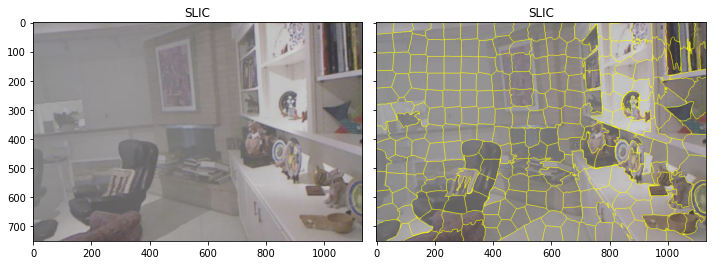

In [11]:
img2 = io.imread( 'Lab 6 - Images/slic.jpg ')
segments_slic = slic(img2, n_segments= 250 , compactness= 10 , sigma= 1 , start_label= 1 )
print ( f"SLIC number of segments: { len (np.unique(segments_slic))} " )
fig, ax = plt.subplots( 1 , 2 , figsize=( 10 , 10 ), sharex= True , sharey= True )

ax[0].imshow(img2)
ax[0].set_title( 'SLIC' )
ax[1].imshow(mark_boundaries(img2, segments_slic))
ax[1].set_title( 'SLIC' )
# for a in ax.flatten():
#     a.set_axis_off()
plt.tight_layout()
plt.show()

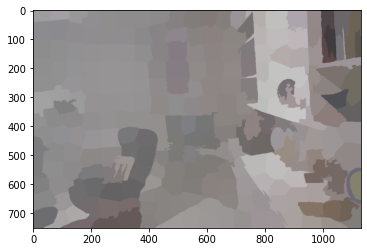

In [12]:
def superpixel_mean_image(image, slic_labels):
## Code taken from https://stackoverflow.com/a/57746835 Turn image into superpixel image, given SLIC segment labels.
    im_rp=image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        #print(loc)
        mm=np.mean(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm
    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')

superpixel_image = superpixel_mean_image(img2,segments_slic)
plt.imshow(superpixel_image)


In [ ]:
def superpixel_median_image(image, slic_labels):
## Code taken from https://stackoverflow.com/a/57746835 Turn image into superpixel image, given SLIC segment labels.
    im_rp=image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        #print(loc)
        mm=np.median(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm
    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')

superpixel_image = superpixel_mean_image(img2,segments_slic)
plt.imshow(superpixel_image)

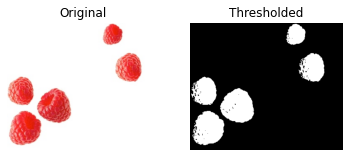

In [14]:
from skimage import io, color, filters, util
import matplotlib.pyplot as plt

img1 = io.imread( 'Lab 6 - Images/raspberry.jpg' )
G = util.img_as_ubyte(color.rgb2gray(img1))
T = filters.threshold_otsu(G)
S = util.img_as_float(G > T)
plt.subplot(1,2,1); plt.imshow(img1)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(1-S, cmap='gray')
plt.title("Thresholded"); plt.axis("off")
plt.show()